# Mini Project #3
---

워싱턴 킹 카운티 (King County, WS) 주택 거래 가격 예측

---

# 패키지 임포트

In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import cross_val_score
import datetime

## 데이터셋 입력 및 레이블 분리

In [2]:
# 데이터 읽기
input_file_name = "data/kc_house_data.csv"
df_train = pd.read_csv(input_file_name, header=0)

In [3]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 데이터 전처리

In [4]:
# id, date 제거
df_train = df_train.drop(['id', 'date'], axis=1)

In [5]:
df_train['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [6]:
corr_metrics = df_train.corr(numeric_only=True)

In [7]:
corr_metrics['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

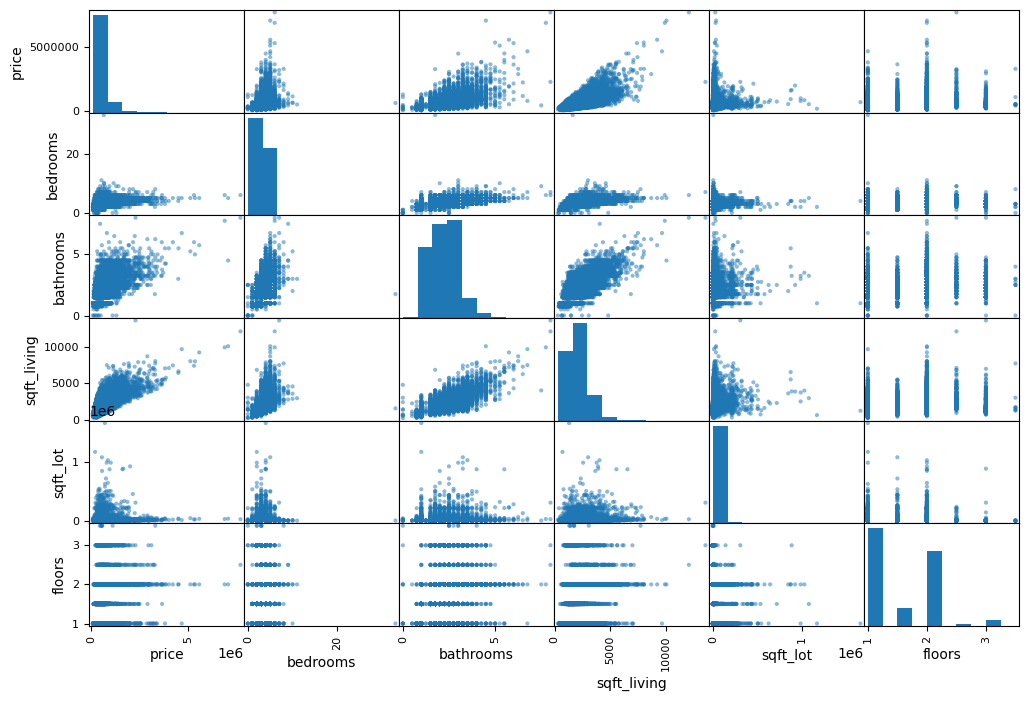

In [8]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
scatter_matrix(df_train[attributes], figsize=(12, 8))
plt.show()

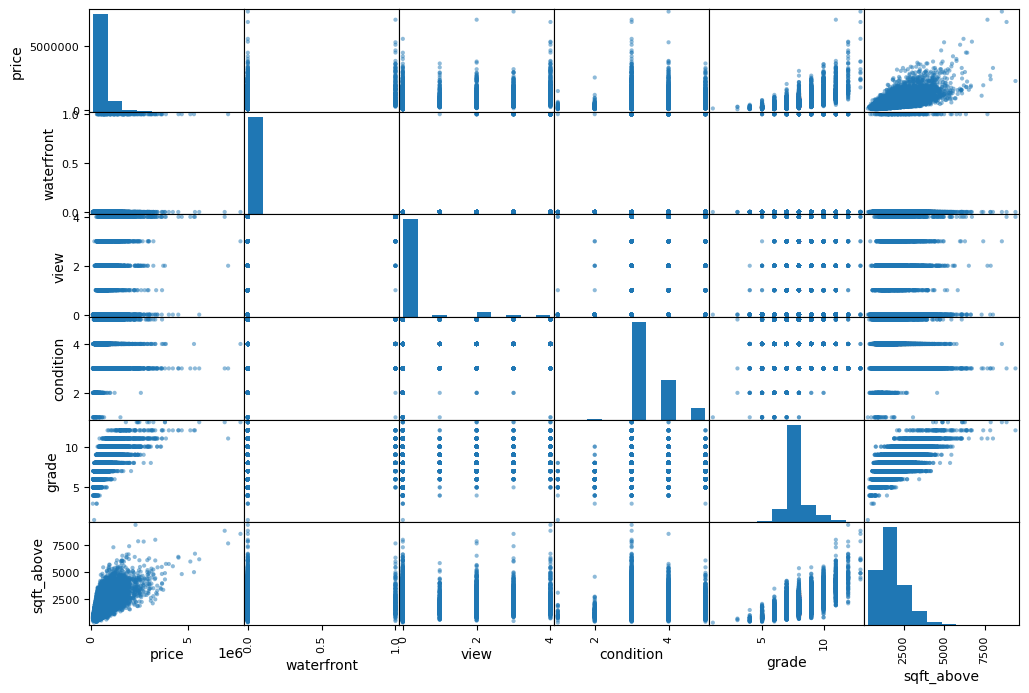

In [9]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['price', 'waterfront', 'view', 'condition', 'grade', 'sqft_above']
scatter_matrix(df_train[attributes], figsize=(12, 8))
plt.show()

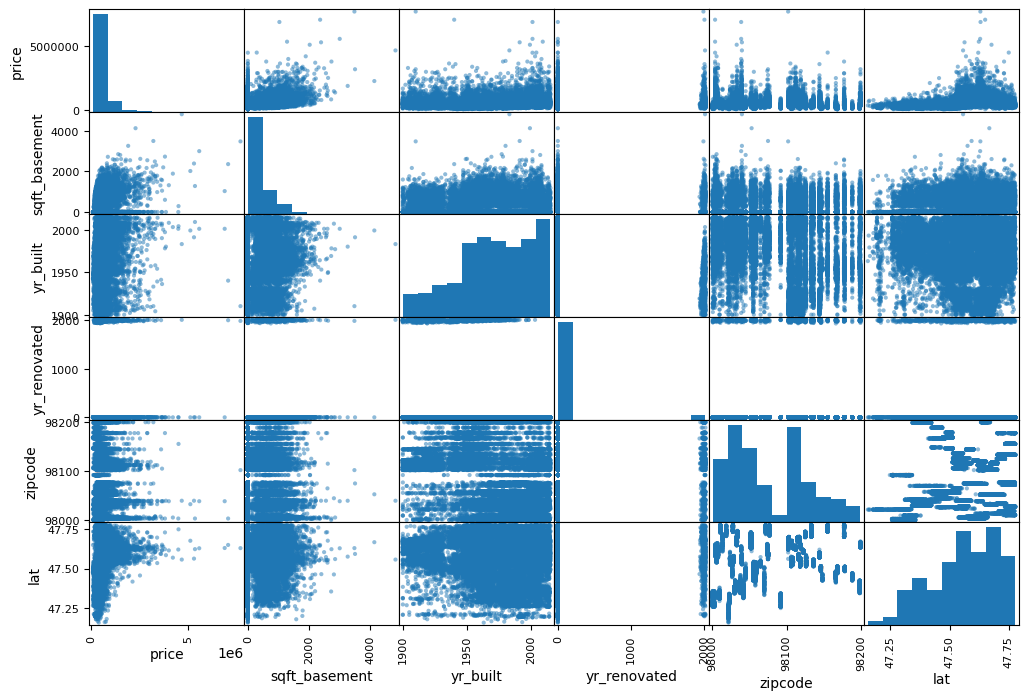

In [10]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['price', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat']
scatter_matrix(df_train[attributes], figsize=(12, 8))
plt.show()

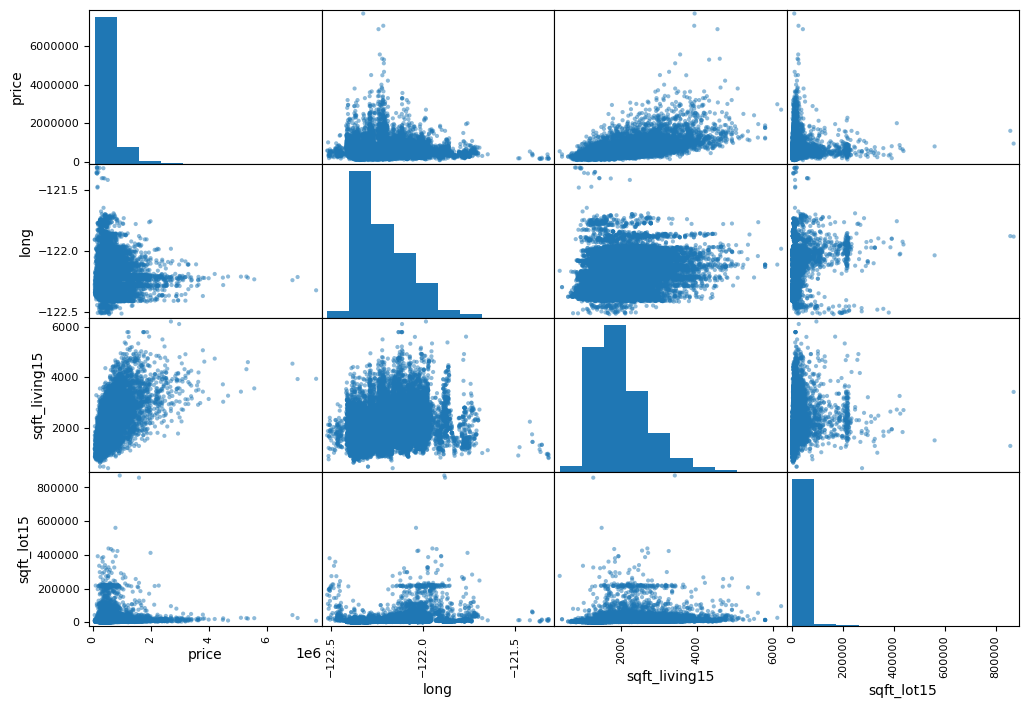

In [11]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['price', 'long', 'sqft_living15', 'sqft_lot15']
scatter_matrix(df_train[attributes], figsize=(12, 8))
plt.show()

In [12]:
def save_log(desc, con):
    with open('log/ML-P3.log', 'a') as f:
        f.write("\n\n" + desc + "\n")
        f.writelines('\n'.join(con))

from sklearn.ensemble import RandomForestRegressor

x = df_train.drop('price', axis=1).to_numpy()
y = df_train['price'].to_numpy()

model = RandomForestRegressor()
model.fit(x, y)
model = joblib.load('models/project3/RF/randomForest.joblib')
score = cross_val_score(model, x, y, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
score = np.sqrt(-score)
print("Random Forest Cross-Validation RMSE:", score.mean())
save_log("Random Forest Cross-Validation", ["score : " + str(score.mean())])
# 28s 소요

Random Forest Cross-Validation RMSE: 128002.6173448776


## Grid Search 함수 정의

In [13]:
from sklearn.model_selection import GridSearchCV

def tune_model(model, data, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=3, verbose=2, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(data, y_train)
    print(f"Best params for", model.__class__.__name__, ":", grid_search.best_params_)
    print("Best Cross-Validation Score:", np.sqrt(-grid_search.best_score_))
    return grid_search.best_estimator_, grid_search.best_params_, np.sqrt(-grid_search.best_score_)


## 로그 및 모델 저장

In [14]:
def save_log(desc, con):
    with open('log/ML-P3.log', 'a') as f:
        f.write("\n\n" + desc + "\n")
        f.writelines('\n'.join(con))

In [15]:
x_train = df_train.drop('price', axis=1)
y_train = df_train['price']

In [16]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

## SVR

In [17]:
from sklearn.svm import SVR

In [ ]:
# SVR 모델 학습
model = SVR()
model.fit(x_train, y_train)

joblib.dump(model, 'models/project3/SVR/svr.joblib')

In [ ]:
# SVR 모델 교차 검증
model = joblib.load('models/project3/SVR/svr.joblib')
score = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
score = np.sqrt(-score)
print("SVR Cross-Validation RMSE:", score.mean())
save_log(
    f'SVR Cross-Validation {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}',
    [
        "score : " + str(score.mean())
    ]
)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Linear Regression 모델 학습
model = LinearRegression()
model.fit(x_train, y_train)

joblib.dump(model, 'models/project3/LR/linearRegression.joblib')

In [ ]:
# Linear Regression 모델 교차 검증
model = joblib.load('models/project3/LR/linearRegression.joblib')
score = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
score = np.sqrt(-score)
print("Linear Regression Cross-Validation RMSE:", score.mean())
save_log(
    f'Linear Regression Cross-Validation {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}',
    [
        "score : " + str(score.mean())
    ]
)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Random Forest Grid Search
model = RandomForestRegressor(n_jobs = -1)
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 3, 5, 7, 9]
}

model, best_params, best_score = tune_model(model, x_train, param_grid)
joblib.dump(model, 'models/project3/RF/randomForest.joblib')
save_log(
    f'Random Forest Grid Search {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}',
    [
        "best_params : " + str(best_params),
        "best_score : " + str(best_score)
    ]
)

In [ ]:
# Random Forest 모델 학습
model = RandomForestRegressor()
model.fit(x_train, y_train)

joblib.dump(model, 'models/project3/RF/randomForest.joblib')

In [ ]:
# Random Forest 모델 교차 검증
model = joblib.load('models/project3/RF/randomForest.joblib')
score = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
score = np.sqrt(-score)
print("Random Forest Cross-Validation RMSE:", score.mean())
save_log(
    f'Random Forest Cross-Validation {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}',
    [
        "score : " + str(score.mean())
    ]
)

## XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBoost Grid Search
model = XGBRegressor(n_jobs = -1)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

model, best_params, best_score = tune_model(model, x_train, param_grid)
joblib.dump(model, 'models/project3/XGB/xgboost.joblib')
save_log(
    f'XGBoost Grid Search {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}',
    [
        "best_params : " + str(best_params),
        "best_score : " + str(best_score)
    ]
)

In [ ]:
# XGBoost 모델 학습
model = XGBRegressor()
model.fit(x_train, y_train)

joblib.dump(model, 'models/project3/XGB/xgboost.joblib')

In [ ]:
# XGBoost 모델 교차 검증
model = joblib.load('models/project3/XGB/xgboost.joblib')
score = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
score = np.sqrt(-score)
print("XGBoost Cross-Validation RMSE:", score.mean())
save_log(
    f'XGBoost Cross-Validation {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}',
    [
        "score : " + str(score.mean())
    ]
)